In [ ]:
import pandas as pd

In [ ]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]


In [ ]:
data = {}
for f in data_files:
    d = pd.read_csv("{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d

In [ ]:
print(data["sat_results"].head())

In [ ]:
for k in data:
    print(data[k].head())

In [ ]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
print(survey.head())

In [ ]:
survey["DBN"] = survey['dbn']
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

survey = survey.loc[:, survey_fields]
data["survey"] = survey

print(survey.head())

In [ ]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    return str(num).zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

In [ ]:
cols = ['SAT Math Avg. Score', 
        'SAT Critical Reading Avg. Score',
        'SAT Writing Avg. Score']

for c in cols:
    data['sat_results'][c] = pd.to_numeric(data["sat_results"][c], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
print(data['sat_results']['sat_score'].head())

In [ ]:
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

print(data["hs_directory"].head())

In [ ]:
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[0].replace("(", "")
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors = "coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors = "coerce")

In [ ]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
print(class_size.head())

In [14]:
import numpy as np

In [15]:
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
print(data["class_size"].head())

      DBN
0  01M292
1  01M448
2  01M450
3  01M458
4  01M509


/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_7527/914849166.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  class_size = class_size.groupby("DBN").agg(np.mean)


In [16]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

In [17]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"]=="2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"]=="Total Cohort"]
print(data["graduation"].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \


# Converting AP Test Scores


We're almost ready to combine all of the datasets. The last thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are rarer in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

    AP Test Takers (note that there's a trailing space in the column name)
    Total Exams Taken
    Number of Exams with scores 3 4 or 5

## Instructions

Convert each of the following columns in ap_2010 to numeric values using the pandas.to_numeric() function with the keyword argument errors="coerce".
    
    AP Test Takers
    Total Exams Taken
    Number of Exams with scores 3 4 or 5

Display the column types using the dtypes attribute.

In [18]:
cols = ["AP Test Takers ", 
        "Total Exams Taken", 
        "Number of Exams with scores 3 4 or 5"]

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


# Left, Right, Inner, and Outer Joins

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas pandas.DataFrame.merge() function, which supports four types of joins -- left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.

We'll be using the DBN column to identify matching rows across datasets. In other words, the values in that column help us know which row from the first dataset to combine with which row in the second dataset.

There may be DBN values that exist in one dataset but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other datasets and other datasets may have DBN values that don't exist in sat_results.

We'll merge two datasets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining datasets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row has columns from all of the datasets.

The merge strategy we pick affects the number of rows we end up with. Let's take a look at each strategy.

Let's say we're merging the following two datasets:

With an inner merge, we'd only combine rows where the same DBN exists in both datasets. We'd end up with this result:

With a left merge, we'd only use DBN values from the dataframe on the "left" of the merge. In this case, sat_results is on the left. Some of the DBNs in sat_results don't exist in class_size, though. The merge handles this by assiging null values to the columns in sat_results that don't have corresponding data in class_size.

With a right merge, we'll only use DBN values from the dataframe on the "right" of the merge. In this case, class_size is on the right:

With an outer merge, we'll take any DBN values from either sat_results or class_size:

As you can see, each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully and what trade-offs you're willing to make.

Since this project is concerned with determining demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.


# Performing the Left Joins

Both the ap_2010 and the graduation datasets have many missing DBN values, so we'll use a left join when we merge the sat_results data set with them. Since we're using a left join, our final dataframe will have all of the same DBN values as the original sat_results dataframe.

We'll need to use the pandas df.merge() method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into df.merge().

Because we're using the DBN column to join the dataframes, we'll need to specify the keyword argument on="DBN" when calling pandas.DataFrame.merge().

First, we'll assign data["sat_results"] to the variable combined. Then, we'll merge the other dataframes with combined. When we're finished, combined has columns from all of the datasets.

## Instructions

Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 dataset into combined.
    
    Make sure to specify how="left" as a keyword argument to indicate the correct join type.
    Make sure to assign the result of the merge operation back to combined.

Use the pandas df.merge() method to merge the graduation dataset into combined.
    
    Make sure to specify how="left" as a keyword argument to get the correct join type.
    Make sure to assign the result of the merge operation back to combined.

Display the first few rows of combined to verify that the correct operations occurred.

Use the pandas.DataFrame.shape attribute to display the shape of the dataframe and see how many rows now exist.

In [22]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], 
                          on="DBN", 
                          how="left")
combined = combined.merge(data["graduation"], 
                          on="DBN", 
                          how="left")
print(combined.head(5))
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

# Performing the Inner Joins

Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Since these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

## Instructions
Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.

    Be sure to follow the exact order above.
    Remember to specify the correct column to join on, as well as the correct join type.

Display the first few rows of combined to verify that the correct operations occurred.

Use the pandas.DataFrame.shape attribute to display the shape of the dataframe to see how many rows now exist.

In [23]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], 
                              on="DBN",
                              how="inner")

print(combined.head(5))
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

# Filling in Missing Values

You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other datasets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The dataset also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column, like so:

In the diagram above, the mean of the first column is (1800 + 1600 + 2200 + 2300) / 4, or 1975, and the mean of the second column is (20 + 30 + 30 + 50) / 4, or 32.5. We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the pandas.DataFrame.fillna() method. This method replaces any missing values in a dataframe with the values we specify. We can compute the mean of every column using the pandas.DataFrame.mean() method. If we pass the results of the df.mean() method into the df.fillna() method, pandas fills in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:

means = df.mean()
df = df.fillna(means)

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the df.fillna() method along with the df.mean() method, because there won't be a mean.

We should fill any NaN or null values that remain after the initial replacement with the value 0. We can do this by passing 0 into the df.fillna() method.

## Instructions

Calculate the means of all of the columns in combined using the pandas.DataFrame.mean() method.

Fill in any missing values in combined with the means of the respective columns using the pandas.DataFrame.fillna() method.

Fill in any remaining missing values in combined with 0 using the df.fillna() method.

Display the first few rows of combined to verify that the correct operations occurred.

In [24]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
print(combined.head(5))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_7527/746130566.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined = combined.fillna(combined.mean())


# Adding a School District Column for Mapping

We've finished cleaning and combining our data! We now have a clean dataset we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the dataset that specifies the school district helps us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

For example, we can use indexing to extract the first few characters of a string, like this:

name = "Sinbad"

print(name[0:2])

## Instruction

Write a function that extracts the first two characters of a string and returns them.

Apply the function to the DBN column of combined and assign the result to the school_dist column of combined.

Display the first few items in the school_dist column of combined to verify the results.

In [25]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# Finding Correlations With the r Value

Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, to measure how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value determines whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation. To learn more about r values, see the statistics course.

The columns in the following diagram have a strong positive correlation -- when the value in class_size is high, the corresponding value in sat_score is also high, and vice versa:

The r value for the columns in the diagram above is .99.

The columns in the following diagram have a strong negative correlation -- when the value in class_size is high, the corresponding value in sat_score is low, and when the value in sat_score is high, the value in class_size is low:

The r value for the columns in the diagram above is -.99.

In the next diagram, the columns aren't correlated -- class_size and sat_score don't have any strong pattern in their values:

The r value for the columns in the diagram above is -.02, which is very close to 0.

In general, r values above .25 or below -.25 are enough to qualify a correlation as interesting. An r value isn't perfect and doesn't indicate that there's a correlation -- just the possiblity of one. To assess whether a correlation exists, we need to look at the data using a scatterplot to see its "shape." For example, here's a scatterplot with a very strong negative r value of -.73:

Notice how in the image above, all of the points appear to fall along a line. This pattern indicates a correlation.

Here's a scatterplot with an r value of .15, which indicates a weak correlation:

Notice how the data points in the image go in several directions, and there's no clear linear relationship. We'll explore correlations in greater detail later on in the statistics content. For now, this quick primer should be enough to get us through this project.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women and vice-versa.

We can use the pandas pandas.DataFrame.corr() method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original dataset.

## Instructions

Use the pandas.DataFrame.corr() method on the combined dataframe to find all possible correlations. Assign the result to correlations.

Filter correlations so that it only shows correlations for the column sat_score.

Display all of the rows in correlations and examine them.

In [27]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986798
SAT Math Avg. Score                0.972745
SAT Writing Avg. Score             0.987949
sat_score                          1.000000
AP Test Takers                     0.515451
                                     ...   
Census Tract                       0.047139
BIN                                0.040717
BBL                                0.032752
lat                               -0.120554
lon                               -0.120554
Name: sat_score, Length: 78, dtype: float64


# Plotting Enrollment With the Plot() Accessor

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.

    Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.

Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.

Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.

Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).

There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).

The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

Since enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot represents a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") creates a scatterplot of columns A and B.

## Instructions

Create a scatterplot of total_enrollment (on the horizontal axis) versus sat_score (on the vertical axis).

In [29]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 10.0 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt

/Users/dustinober/miniconda3/envs/NYC_Schools/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


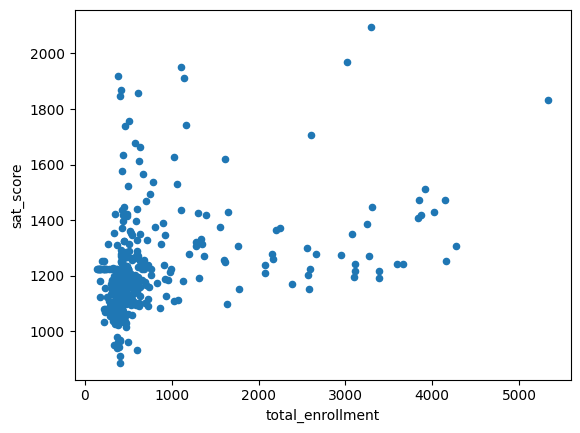

In [31]:
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

# Exploring Schools with Low SAT Scores and Enrollment

Judging from the plot we just created, it doesn't appear there's a strong correlation between sat_score and total_enrollment. If there was a strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

## Instructions

Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. Assign the result to low_enrollment.

Display all of the items in the School Name column of low_enrollment.

Use Wikipedia and Google to research the names of the schools. Can you discover anything interesting about them?

In [32]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

93       INTERNATIONAL COMMUNITY HIGH SCHOOL
129                                        0
130          BRONX INTERNATIONAL HIGH SCHOOL
143    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
145    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
180                                        0
183            HIGH SCHOOL OF WORLD CULTURES
192       BROOKLYN INTERNATIONAL HIGH SCHOOL
230    INTERNATIONAL HIGH SCHOOL AT PROSPECT
242               IT TAKES A VILLAGE ACADEMY
258                MULTICULTURAL HIGH SCHOOL
291    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


# Plotting Language Learning Percentage

Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.



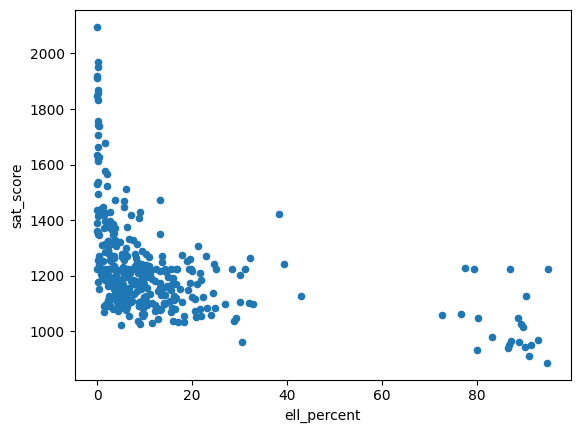

In [33]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

# Calculating District-Level Statistics

One way to make very granular statistics easier to read is to aggregate them. In this case, we aggregate by district, which enables us to understand how ell_percent varies district-by-district instead of the unintelligibly granular school-by-school variation.

In a previous lesson, we used the pandas.DataFrame.groupby() method followed by the agg() method on the resulting object to find the mean class size for each unique DBN. The principle is exactly the same, except that here we'd find the mean of each column for each unique value in school_dist.

## Instructions

Find the average values for each column for each school_dist in combined.

    Use the pandas.DataFrame.groupby() method to group combined by school_dist.

    Use the agg() method, along with the numpy.mean function as an argument to calculate the average of each group.

    Assign the result to the variable districts.

Reset the index of districts, making school_dist a column again.

    Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.

Display the first few rows of districts to verify that everything went okay.

In [34]:
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       429.780885           446.400885   
2          03                       428.626844           438.043510   
3          04                       402.142857           416.285714   
4          05                       427.215339           438.262958   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.398724         172.574163   
1              427.514690  1303.696460       126.304211         197.225263   
2              426.988938  1293.659292       155.854067         244.003190   
3              405.714286  1224.142857       128.693780         183.370472   
4              419.707965  1285.186262        85.561176         115.470950   

   Number of Exams with scores 3 4 or 5  Total Cohort  \
0                            135.800000     93.

# Exploring Safety and SAT Scores

On the last screen, you may have noticed that saf_t_11 and saf_s_11, which measure how teachers and students perceive safety at school, correlated highly with sat_score. On this screen, we'll dig into this relationship a bit more and try to figure out which schools have low safety scores.

/Users/dustinober/miniconda3/envs/NYC_Schools/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='saf_s_11', ylabel='sat_score'>

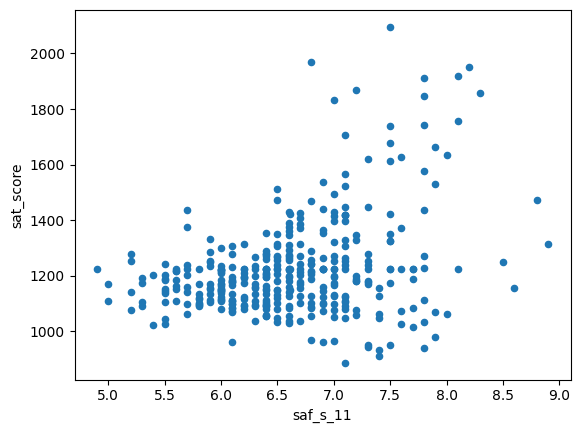

In [35]:
combined.plot.scatter("saf_s_11", "sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.



# Racial differences in SAT scores


<AxesSubplot: >

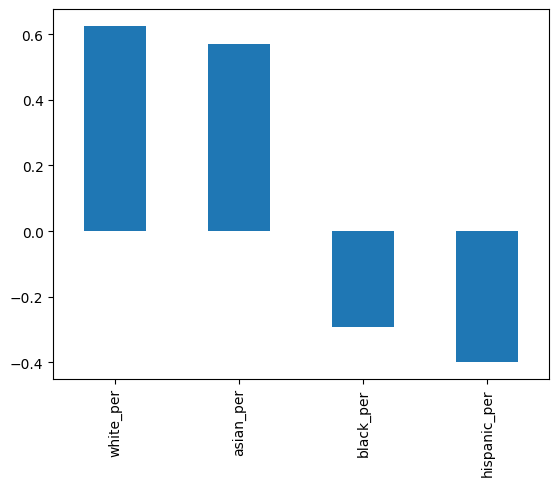

In [38]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.



/Users/dustinober/miniconda3/envs/NYC_Schools/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='hispanic_per', ylabel='sat_score'>

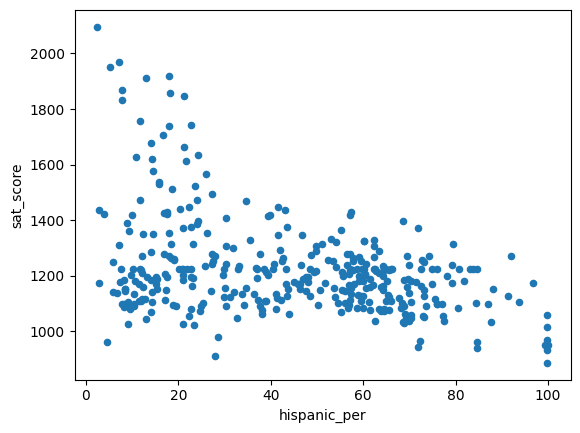

In [39]:
combined.plot.scatter("hispanic_per", "sat_score")


In [40]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])


46                         MANHATTAN BRIDGES HIGH SCHOOL
84      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
91     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
129                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
145                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
180     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
258                            MULTICULTURAL HIGH SCHOOL
291               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [41]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])


39                                STUYVESANT HIGH SCHOOL
155                         BRONX HIGH SCHOOL OF SCIENCE
191                       BROOKLYN TECHNICAL HIGH SCHOOL
332    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
361                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.



# Gender differences in SAT scores


<AxesSubplot: >

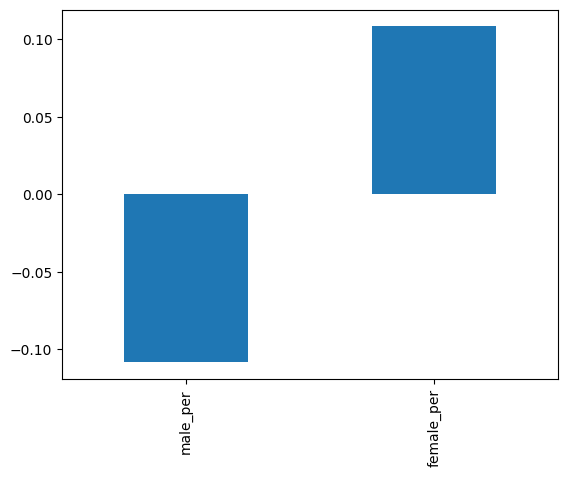

In [42]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.



/Users/dustinober/miniconda3/envs/NYC_Schools/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='female_per', ylabel='sat_score'>

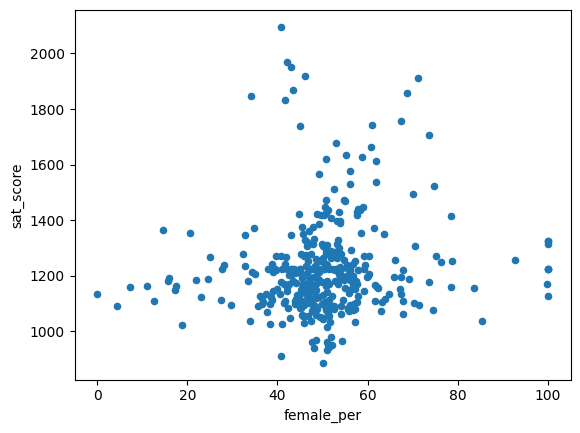

In [43]:
combined.plot.scatter("female_per", "sat_score")


Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.



In [44]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
28                         ELEANOR ROOSEVELT HIGH SCHOOL
62                                    BEACON HIGH SCHOOL
63     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
307                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.



# AP Exam Scores vs SAT Scores


In [ ]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')
